# 1、区分过拟合、欠拟合，如下图

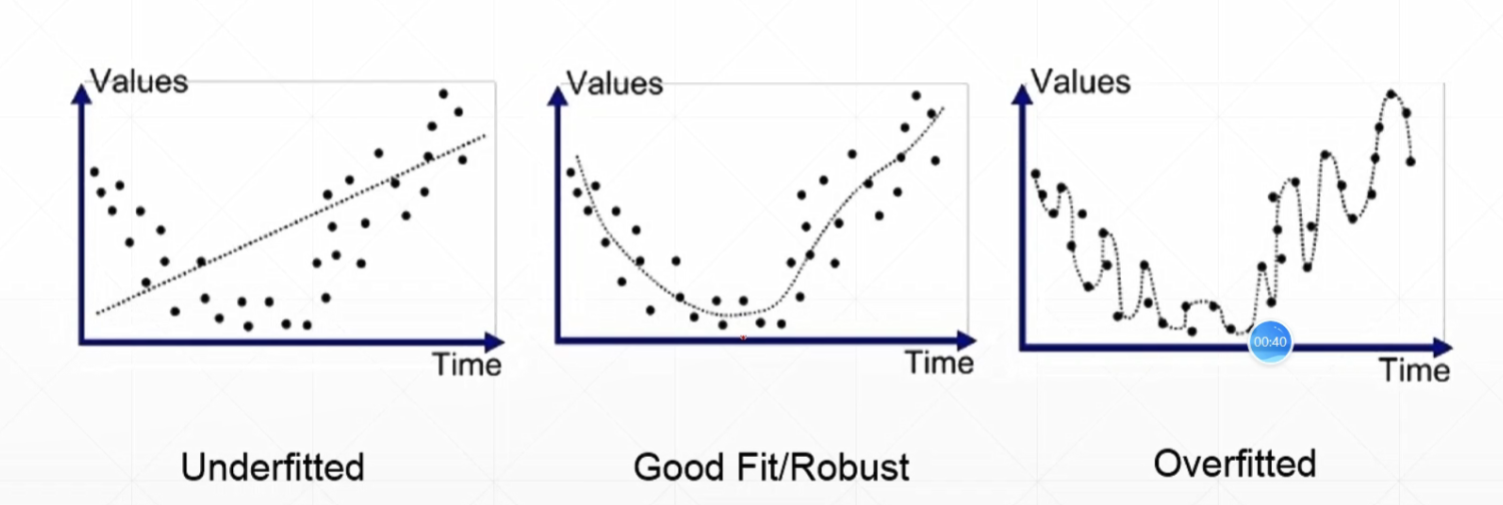

# 2、将数据集划分为训练集、交叉验证集、测试集
## train set：训练网络
## validation set：选取网络模型
## test set：评估性能

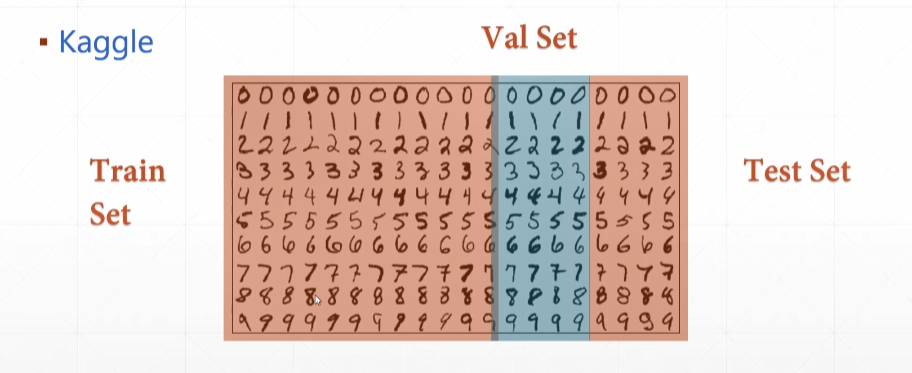

In [ ]:
#最简单的直接在下载数据的时候便默认分好
(x,y),(x_val,y_val) = datasets.mnist.load_data()

db = tf.data.Datasets.from_tensor_slices((x,y))
db = db.map(proprecess).shuffle(10000).batch(batchsz)

ds_val = tf.data.Datasets.from_tensor_slices((x_val,y_val))
ds_val = ds_val.map(proprecess).batch(batchsz)


In [ ]:
# 在此基础之上，继续将测试集划分，为训练集、交叉验证集
(x,y),(x_test,y_test) = datasets.mnist.load_data()

x_train,x_val = tf.split(x,num_or_size_splits = [50000,10000])
y_train,y_val = tf.split(y,num_or_size_splits = [50000,10000])
db_train = tf.data.Dataset.from_tensor_slices((x_train,y_train))
db_train = db.map(proprecess).shuffle(50000).batch(batchsz)

db_val = tf.data.Dataset.from_tensor_slices((x_val,y_val))
db_val = db_val.map(proprecess).batch(batchsz)

db_test = tf.data.Dataset.from_tensor_slices((x_test,y_test))
db_test = db_test.map(proprecess).batch(batchsz)



In [ ]:
# 直接用现成的函数进行交叉验证集的测试
network.compile(optimizer = optimizers,
               loss = tf.CategoricalCrossentropy(from_logits= True),
               metrics = ['accuracy'])
network.fit(db_train,epochs = 5,validation_data = db_val,validation_freq = 2)
#这里的意思就是直接将db_val作为了交叉验证集

In [ ]:
# 打乱训练集和交叉验证集，实现数据的最大利用
for epoch in range(500):
    idx = tf.range(60000)
    idx = tf.random.shuffle(idx)
    x_train,y_train = tf.gather(x,idx[:50000]),tf.gather(y,idx[:50000])
    x_val,y_val = tf.gather(x,idx[-1000:]),tf.gather(y,idx[-1000:])
    
    db_train = tf.data.Dataset.from_tensor_slices((x_train,y_train))
    db_train = db.map(proprecess).shuffle(50000).batch(batchsz)

    db_val = tf.data.Dataset.from_tensor_slices((x_val,y_val))
    db_val = db_val.map(proprecess).shuffle(10000).batch(batchsz)

In [ ]:
# 同样也有一句话实现的简便调用
#它是将除测试机之外的所有数据放进去，按比例随机的划分，得到训练集和交叉验证集
network.fit(db_train_val,epochs = 6,validation_split=0.1,validation_freq=2)